<a href="https://colab.research.google.com/github/yujiimt/chainer_tutorial/blob/master/chainer_tutorial/chainer_tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import chainer 
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
x, t = load_iris(return_X_y = True)

print('x',x.shape)
print('t',t.shape)

x (150, 4)
t (150,)


In [0]:
"""

chainerでは入力値のデータ型はnumpy.float32,
分類問題は、目標値のデータ型は、numpy.int32である必要がある

"""


x = x.astype('float32')
t = t.astype('int32')

In [0]:
x_train_val, x_test, t_train_val, t_test = train_test_split(x, t, test_size=0.3, random_state=0)
x_train, x_val, t_train, t_val = train_test_split(x_train_val, t_train_val, test_size=0.3, random_state=0)

In [0]:
#パラメーターを持つ関数(層)：リンク
import chainer.links as L 
#パラメーターを持たない関数(層):ファンクション
import chainer.functions as F

In [0]:
#sequential によるネットワーク定義
#入力次元数が3,出力次元数が2の全結合層
l = L.Linear(3,2)

In [0]:
from chainer import Sequential

#net としてインスタンス化

n_inputs = 4
n_hidden = 10
n_outputs = 3

net = Sequential(
       L.Linear(n_inputs,n_hidden),F.relu,
       L.Linear(n_hidden,n_hidden),F.relu,
       L.Linear(n_hidden,n_outputs)
)

In [17]:
#最適化手法を確率勾配降下方にする
optimizer = chainer.optimizers.SGD(lr=0.01)
#netを選択する
optimizer.setup(net)

In [18]:
#ネットワークの訓練
n_epochs = 30
n_batchsize = 16

""""
ネットワークは以下の処理を繰り替えす

------------------------
1.訓練用のバッチを準備
2.予測値を計算し、目的関数を適用(順伝播)
3.勾配を計算(逆伝播)
4パラメーターを更新
"""


iteration = 0

#ログの保存用
results_train  = {
        'loss': [],
        'accuracy': []
}

results_valid = {
        'loss': [],
        'accuracy': []
}

for epoch in range(n_epochs):
      
      #データセット順番に並べ替えた順番を取得
      order = np.random.permutation(range(len(x_train)))
          
      #各バッチ毎の目的関数を出力と分類精度の保存用
      loss_list = []
      accuracy_list = []
      
      for i in range(0, len(order), n_batchsize):
            #　バッチを準備
            
            index = order[i: i+n_batchsize]
            x_train_batch = x_train[index,:]
            t_train_batch = t_train[index]
            
            
            # 予測値を出力
            y_train_batch = net(x_train_batch)
            
            
            #目的関数を適用し、分類精度を計算
            loss_train_batch = F.softmax_cross_entropy(y_train_batch, t_train_batch)
            accuracy_train_batch = F.accuracy(y_train_batch, t_train_batch)
            
            loss_list.append(loss_train_batch.array)
            accuracy_list.append(accuracy_train_batch.array)
            
            #勾配のリセットと勾配の計算
            net.cleargrads()
            loss_train_batch.backward()
            
            #パラメーターの更新
            optimizer.update()
            
            
            #カウントアップ
            iteration += 1
          
      #訓練データに対する目的関数の出力と分類精度を集計
      loss_train = np.mean(loss_list)
      accuracy_train = np.mean(accuracy_list)
      
      
      # 1エポック終えたら、検証データで評価
      # 検証データで予測値を出力
      with chainer.using_config('train',False), chainer.using_config('enable_backprop',False):
            y_val = net(x_val)
          
          
      # 目的関数を適用し、分類精度を計算
      loss_val = F.softmax_cross_entropy(y_val, t_val)
      accuracy_val = F.accuracy(y_val, t_val)
      
      
      
     #結果の表示
      print('epoch: {}, iteration: {}, loss (train): {:.4f}, loss (valid): {:.4f}'.format(
        epoch, iteration, loss_train, loss_val.array))      
      
      
      #ログを保存
      results_train['loss']  .append(loss_train)
      results_train['accuracy']  .append(accuracy_train)
      results_valid['loss']  .append(loss_val.array)
      results_valid['accuracy']  .append( accuracy_val.array)

epoch: 0, iteration: 5, loss (train): 1.0533, loss (valid): 0.9873
epoch: 1, iteration: 10, loss (train): 0.9836, loss (valid): 0.9356
epoch: 2, iteration: 15, loss (train): 0.9239, loss (valid): 0.8857
epoch: 3, iteration: 20, loss (train): 0.8717, loss (valid): 0.8662
epoch: 4, iteration: 25, loss (train): 0.8466, loss (valid): 0.8294
epoch: 5, iteration: 30, loss (train): 0.8009, loss (valid): 0.8142
epoch: 6, iteration: 35, loss (train): 0.7834, loss (valid): 0.7545
epoch: 7, iteration: 40, loss (train): 0.7614, loss (valid): 0.7324
epoch: 8, iteration: 45, loss (train): 0.7444, loss (valid): 0.7002
epoch: 9, iteration: 50, loss (train): 0.7057, loss (valid): 0.6633
epoch: 10, iteration: 55, loss (train): 0.6874, loss (valid): 0.6440
epoch: 11, iteration: 60, loss (train): 0.6565, loss (valid): 0.6141
epoch: 12, iteration: 65, loss (train): 0.6402, loss (valid): 0.6003
epoch: 13, iteration: 70, loss (train): 0.6315, loss (valid): 0.5648
epoch: 14, iteration: 75, loss (train): 0.602

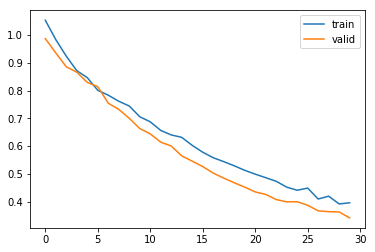

In [19]:
%matplotlib inline
import matplotlib.pyplot as plt



plt.plot(results_train['loss'],label='train')
plt.plot(results_valid['loss'],label='valid')
plt.legend()

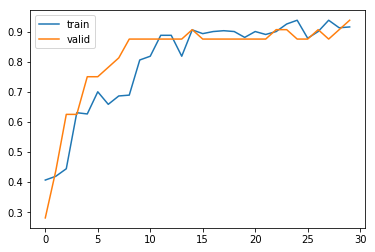

In [20]:
plt.plot(results_train['accuracy'],label='train')
plt.plot(results_valid['accuracy'],label='valid')
plt.legend()

In [0]:
with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
  y_test = net(x_test)

In [22]:
accuracy_test = F.accuracy(y_test,t_test)
accuracy_test.array

array(0.84444445, dtype=float32)

In [23]:
chainer.serializers.save_npz('my_iris.net',net)
! ls

my_iris.net  sample_data


In [0]:
loaded_net = Sequential(
    L.Linear(n_inputs,n_hidden),F.relu,
    L.Linear(n_hidden,n_hidden),F.relu,
    L.Linear(n_hidden,n_outputs)
)

In [0]:
chainer.serializers.load_npz('/content/my_iris.net',loaded_net)

In [0]:
with chainer.using_config('train',False),chainer.using_config('enable_backprop',False):
  y_test = loaded_net(x_test)

In [39]:
np.argmax(y_test[0,:].array)

2